In [1]:
# mounting drive. Remove when testing/running locally
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/nanoscience_mast/deep-learn/hws/hw1/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/nanoscience_mast/deep-learn/hws/hw1


# Problem 1, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 1F: Perform SGD with the new dataset

The following problems consider SGD with the larger, higher-dimensional dataset, sgd_data.csv. The
file has a header denoting which columns correspond to which values. For these problems, use the Jupyter
notebook 1_notebook_part2.ipynb.
For your implementation of problems F–H, do consider the bias term using your answer to problem A


In [3]:
def loss(X, Y, w):
  """
  Calculate the squared loss function.

  Inputs:
      X: A (N, D) shaped numpy array containing the data points.
      Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
      w: A (D, ) shaped numpy array containing the weight vector.

  Outputs:
      The loss evaluated with respect to X, Y, and w.
  """

  return np.sum((Y - np.matmul(X, w)) ** 2)


def gradient(x, y, w):
  """
  Calculate the gradient of the loss function with respect to
  a single point (x, y), and using weight vector w.

  Inputs:
      x: A (D, ) shaped numpy array containing a single data point.
      y: The float label for the data point.
      w: A (D, ) shaped numpy array containing the weight vector.

  Output:
      The gradient of the loss with respect to x, y, and w.
  """
  return 2 * (np.matmul(x, w) - y) * x


def SGD(X, Y, w_start, bias, eta, N_epochs):
  """
  Perform SGD using dataset (X, Y), initial weight vector w_start,
  learning rate eta, and N_epochs epochs.

  Inputs:
      X: A (N, D) shaped numpy array containing the data points.
      Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
      w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
      eta: The step size.
      N_epochs: The number of epochs (iterations) to run SGD.

  Outputs:
      W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
      losses: A (N_epochs, ) shaped array containing the losses from all iterations.
      W: A (D, ) shaped arrary containing the final weight vector.
  """
  N, D = X.shape
  losses = np.zeros(N_epochs)

  # including bias
  w = np.insert(w_start, 0, bias, axis=0)
  X = np.insert(X, 0, 1., axis=1) # adding bias to first of each row

  losses[0] = loss(X, Y, w)
  for i in range(1, N_epochs):
    for j in range(N):
      w = w - eta * gradient(X[j], Y[j], w)
    losses[i] = loss(X, Y, w)

  return w[1:], losses, w[0]


In [4]:
# loading data set
data = np.loadtxt(fname="data/sgd_data.csv", skiprows=1, delimiter=",")
data.shape
x = data[:,:-1]
y = data[:,-1]


eta = 1e-15
w_start = [0.001 for i in range(4)]
bias = 0.001
N_epochs = 800

w_final, losses, bias_final = SGD(x, y, w_start, bias, eta, N_epochs)
print(f"The final weights are: \n{w_final}")
print(f"The final bias is {bias_final}")

The final weights are: 
[0.00099972 0.00099986 0.00099964 0.00099992]
The final bias is 0.0009999604214701934


### Problem G

In [6]:
# Defining step sizes for SGD
etas = np.exp([-i for i in range(10, 16)])
num_epochs = np.linspace(1, N_epochs, N_epochs)

# Determining SGD
errs = np.zeros((len(etas), N_epochs))
for i, eta in enumerate(etas):
  _, errs[i], _ = SGD(x, y, w_start, bias, eta, N_epochs)


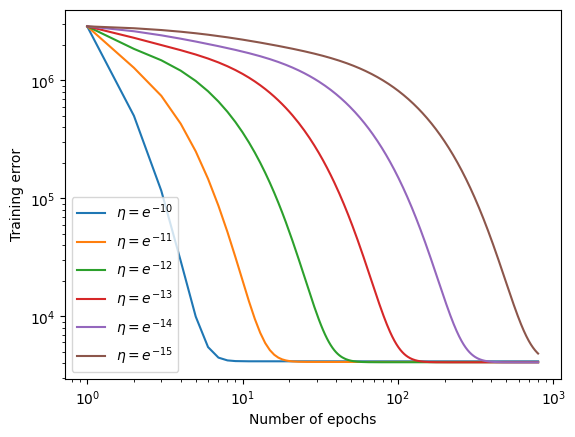

In [7]:
# plotting SGD errors determined from previous cell
labels = [f"$\eta = e^{{-{i}}}$" for i in range(10,16)]
for err, label in zip(errs, labels):
  plt.loglog(num_epochs, err, label=label)
plt.ylabel("Training error")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Even for the larger and higher dimensional dataset, the convergence is slower for smaller step sizes as expected. This is due to the gradient remaining relatively similar in the vacinity. Therefore, for smaller step sizes, it takes more epochs to get a significant change in the weights.

### Problem H
The closed-form solution for linear regression with least squares is:
$$ \textbf{w} = \left(\sum_{i=1}^N\textbf{x}_i\textbf{x}_i^\text{T}\right)^{-1} \left(\sum_{i=1}^N\textbf{x}_iy_i\right) = (\textbf{x}\cdot\textbf{x})^{-1} \textbf{x}\cdot \vec{y} ,$$
and is implemented below:

In [10]:

# reloading data
data = np.loadtxt(fname="data/sgd_data.csv", skiprows=1, delimiter=",")
data.shape
x = data[:,:-1]
y = data[:,-1]

# adjusting such that we get vector including bias
x = np.insert(x, 0, 1., axis=1)

w_analytical = np.linalg.inv(x.T @ x) @ (y @ x)


print(f"Final computed weights: {w_final}")
print(f"Final computed bias: {bias_final}")
print(f"Analytical weights: {w_analytical[1:]}")
print(f"Analytical bias: {w_analytical[0]}")

Final computed weights: [0.00099972 0.00099986 0.00099964 0.00099992]
Final computed bias: 0.0009999604214701934
Analytical weights: [ -5.99157048   4.01509955 -11.93325972   8.99061096]
Analytical bias: -0.3164425132713451


The results do not match up. This is likely as the step-size is too small for the number of epochs being used. This is investigated in the cell below by increases the step size to 1e-4.

In [9]:
data = np.loadtxt(fname="data/sgd_data.csv", skiprows=1, delimiter=",")
data.shape
x = data[:,:-1]
y = data[:,-1]

eta = 1e-4
w_test, _, bias = SGD(x, y, w_start, bias, eta, N_epochs)
print(f"For eta = {eta}, The final weights are: \n{w_test}")
print(f"The final bias is {bias}")

For eta = 0.0001, The final weights are: 
[ -6.00831085   3.99071693 -11.94656476   8.98112925]
The final bias is -0.2924618115226372


We notice now that the final weights and bias are much closer to the analytical solution.

### Problem I
I cannot think of a reason to use SGD when a closed-form solution exits due to the much heavier computations needed for SGD.

### Problem J
A stopping condition that is much better is a tolerance on the training error. Even better would be to notice when the change in the training error is below a certain tolerance for several consequetive epochs.

### Problem K
In Perceptron algorithms, only the direction of the weight vector matters as it deals with classification, thus the goal is to find a hyperplane of separation. It does not converge if the dataset is not linearly separable, and as a result early stopping is necssary. Contrarily, early stopping for SGD is not laways necessary.